# Assignment 1: Image Filtering and Hybrid Images

In [8]:
from PIL import Image
import numpy as np
import math
from scipy import signal
import cv2

from IPython.display import Image

## Part 2: Gaussian Filtering

### Question 1

As a simple warm-up exercise, write a Python function, `boxfilter(n)`, that returns a box filter of size n by n . 
You should check that n is odd, checking and signaling an error with an `assert` statement. 
The filter should be a Numpy array. For example, your function should work as follows:

    >>> boxfilter(5)
    array([[ 0.04, 0.04, 0.04, 0.04, 0.04], 
           [ 0.04, 0.04, 0.04, 0.04, 0.04],
           [ 0.04, 0.04, 0.04, 0.04, 0.04],
           [ 0.04, 0.04, 0.04, 0.04, 0.04],
           [ 0.04, 0.04, 0.04, 0.04, 0.04]])

    >>> boxfilter(4)
    Traceback (most recent call last):
    ...
    AssertionError: Dimension must be odd

HINT: 
The generation of the filter can be done as a simple one-line expression. Of course, checking that n is odd requires a bit more work.

In [9]:
def boxfilter(n):

    assert(n>0 and n%2==1 and "Dimension must be odd")

    boxfilter = (n,n)
    boxfilter = np.full(boxfilter, 0.04)  #boxfilter = np.zeros(boxfilter)+0.04
    print(repr(boxfilter), "\n")

    #return boxfilter


# Show the results of boxfilter(n) function for :
# the cases n=3 :
boxfilter(3)

# the cases n=4 :
#boxfilter(4)

# the cases n=5:
boxfilter(5)

array([[0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04]]) 

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]]) 



### Question 2

Write a Python function, `gauss1d(sigma)`, that returns a 1D Gaussian filter for a given value of sigma. 
The filter should be a 1D array with length 6 times sigma rounded up to the next odd integer. 
Each value of the filter can be computed from the Gaussian function, `exp(- x^2 / (2*sigma^2))` , where x is the distance of an array value from the center. 
This formula for the Gaussian ignores the constant factor. 
Therefore, you should normalize the values in the filter so that they sum to 1.

HINTS: 
For efficiency and compactness, it is best to avoid `for` loops in Python. 
One way to do this is to first generate a 1D array of values for x , and map this array through the density function. 
Suppose you want to generate a 1D filter from a zero-centered Gaussian with a sigma of 1.6. 
The filter length would be odd(1.6*6)=11 . 
You then generate a 1D array of x values [-5 -4 -3 -2 -1 0 1 2 3 4 5] and pass the 1D array through the given density function exp(- x^2 / (2*sigma^2)) .

In [10]:
#density function 
#def dens(x, sigma):
#    x = math.exp(-math.pow(x,2) / (2* math.pow(sigma , 2)) )
#    return x


#
def gauss1d(sigma):
    #calcule length of 1D filter
    lenght = int( round(6*sigma) )
    if lenght%2==0 :
        lenght += 1

    #generate a 1D array
    filter1d = (lenght)
    np.zeros(filter1d)


    filter1d = np.arange(-lenght/2, lenght/2)

    #pass the 1D array through the density function exp(- x^2 / (2*sigma^2))
    #probleeeeeeem kayn hnaaaaaaaaa
    #i=0
    #while i<lenght:
    #    filter1d[i] = int( round( dens(i-lenght/2, sigma) ) )
    #    i+=1
    
    #filter1d = np.exp(-math.pow(filter1d,2) / (2* math.pow(sigma , 2)) )
    filter1d = np.exp(- filter1d ** 2 / (2* math.pow(sigma , 2)) )
    
        

    #normalize the values in the filter so that they sum to 1.
    #filter1d = filter1d / np.min(filter1d)
    filter1d = filter1d / np.sum(filter1d)


    print(repr(filter1d), "\n")

    return filter1d



# Show the filter values produced for :
# sigma values of 0.3 : 
gauss1d(0.3)

# sigma values of 0.5 : 
gauss1d(0.5)

# sigma values of 1 : 
gauss1d(1)

# sigma values of 2 : 
gauss1d(2)


array([7.47261342e-06, 4.99996264e-01, 4.99996264e-01]) 

array([0.00907471, 0.49546264, 0.49546264]) 

array([0.00087347, 0.01754418, 0.1296349 , 0.35238419, 0.35238419,
       0.1296349 , 0.01754418]) 

array([0.00101597, 0.00455325, 0.0158924 , 0.04320002, 0.09145444,
       0.15078287, 0.19360904, 0.19360904, 0.15078287, 0.09145444,
       0.04320002, 0.0158924 , 0.00455325]) 



array([0.00101597, 0.00455325, 0.0158924 , 0.04320002, 0.09145444,
       0.15078287, 0.19360904, 0.19360904, 0.15078287, 0.09145444,
       0.04320002, 0.0158924 , 0.00455325])

### Question 3

Create a Python function `gauss2d(sigma)` that returns a 2D Gaussian filter for a given value of sigma. 
The filter should be a 2D array. 
Remember that a 2D Gaussian can be formed by convolution of a 1D Gaussian with its transpose. 
You can use the function `convolve2d` in the Scipy Signal Processing toolbox to do the convolution. 
You will need to provide `signal.convolve2d` with a 2D array. 
To convert a 1D array, f , to a 2D array f , of the same size you use `f = f[np.newaxis]`

In [11]:
#
def gauss2d(sigma):

    #byme
    filter1d = gauss1d(sigma)[np.newaxis]
    filter1d_Tr = gauss1d(sigma).T[np.newaxis]
    #np.matmul(filter1d, filter1d.T)
    #FINbyme

    filter2d = signal.convolve2d(filter1d, filter1d_Tr)
    
    print(repr(filter2d), "\n")
    
    return filter2d
    
# Show the 2D Gaussian filter for :
# sigma values of 0.5 : 
gauss2d(0.5)

# sigma values of 1 : 
gauss2d(1)


array([0.00907471, 0.49546264, 0.49546264]) 

array([0.00907471, 0.49546264, 0.49546264]) 

array([[8.23504495e-05, 8.99236439e-03, 2.54475595e-01, 4.90966460e-01,
        2.45483230e-01]]) 

array([0.00087347, 0.01754418, 0.1296349 , 0.35238419, 0.35238419,
       0.1296349 , 0.01754418]) 

array([0.00087347, 0.01754418, 0.1296349 , 0.35238419, 0.35238419,
       0.1296349 , 0.01754418]) 

array([[7.62955214e-07, 3.06487303e-05, 5.34263289e-04, 5.16427108e-03,
        2.97853834e-02, 1.03953623e-01, 2.20116518e-01, 2.82575244e-01,
        2.20085869e-01, 1.03727158e-01, 2.91697872e-02, 4.54867488e-03,
        3.07798102e-04]]) 



array([[7.62955214e-07, 3.06487303e-05, 5.34263289e-04, 5.16427108e-03,
        2.97853834e-02, 1.03953623e-01, 2.20116518e-01, 2.82575244e-01,
        2.20085869e-01, 1.03727158e-01, 2.91697872e-02, 4.54867488e-03,
        3.07798102e-04]])

### Question 4

#### (a)
Write a function `convolve2d_manual(array, filter)` that takes in an image (stored in `array`) and a filter, and performs convolution to the image with zero paddings (thus, the image sizes of input and output are the same). 
Both input variables are in type `np.float32`. 
Note that for this implementation you should use two for-loops to iterate through each neighbourhood.

In [12]:
def convolve2d_manual(array, filter):
  return 1

#### (b)
Write a function `gaussconvolve2d_manual(array,sigma)` that applies Gaussian convolution to a 2D array for the given value of sigma. 
The result should be a 2D array. 
Do this by first generating a filter with your `gauss2d`, and then applying it to the array with `convolve2d_manual(array, filter)`

In [13]:
def gaussconvolve2d_manual(array,sigma):
    return 1

#### (c)
Apply your `gaussconvolve2d_manual` with a sigma of 3 on the image of the dog.
Load this image into Python, convert it to a greyscale, Numpy array and run your `gaussconvolve2d` (with a sigma of 3). 
Note, as mentioned in class, for any image filtering or processing operations converting image to a double array format will make your life a lot easier and avoid various artifacts. 
Once all processing operations are done, you will need to covert the array back to unsigned integer format for storage and display.

In [14]:

#sigma = 3

#Load dog image :
#dog_image = cv2.cvtColor(cv2.imread('./dog.jpg'), cv2.COLOR_BGR2RGB)

#convert image to a greyscale:
#dog_image_grey =cv2.cvtColor(dog_image, cv2.COLOR_RGB2GRAY)

#convert image to a Numpy array:
#dog_array = np.asarray(dog_image_grey)

#Apply gaussconvolve2d_manual(array,sigma) :
#filtered_img = gaussconvolve2d_manual(dog_array,sigma)

#covert the array back to unsigned integer:
#filtered_img = np.float32(filtered_img)


#### (d)
Use PIL to show both the original and filtered images

In [15]:
#Helper function to compare two the images:
def compare_image(image1, image2):
    plt.figure(figsize=(9,9))
    plt.subplot(1,2,1)
    plt.imshow(image1)
    plt.title('Orignal')
    plt.axis('off')

    #Our Upcoming Events
    plt.subplot(1,2,2)
    plt.imshow(image2)
    plt.title('Modified')
    plt.axis('off')

    plt.tight_layout()

#show both the original and filtered dog image:
#compare_image(dog_image, filtered_img)

### Question 5

#### (a)
Write a function `gaussconvolve2d_scipy(array,sigma)` that applies Gaussian convolution to a 2D array for the given value of sigma. 
The result should be a 2D array. 
Do this by first generating a filter with your `gauss2d`, and then applying it to the array with `signal.convolve2d(array,filter,'same')` . 
The `same` option makes the result the same size as the image.

The Scipy Signal Processing toolbox also has a function `signal.correlate2d`. 
Applying the filter `gauss2d` to the array with `signal.correlate2d(array,filter,'same')` produces the same result as with `signal.convolve2d(array,filter,'same')` . 
Why does Scipy have separate functions `signal.convolve2d` and `signal.correlate2d`? 

In [16]:
def gaussconvolve2d_scipy(array,sigma):

    #generating a filter with your `gauss2d`
    filter = gauss2d(sigma)

    #applying the filter to the array with signal.convolve2d(array, filter)
    gaussconvo_scipy = signal.convolve2d(array,filter,'same')
    
    return gaussconvo_scipy

HINT: 
Think of a situation in which `signal.convolve2d` and `signal.correlate2d` (with identical arguments) produce different results.

#### (b)
Apply your `gaussconvolve2d_scipy` with a sigma of 3 on the image of the dog again. 
Follow instructions in part 4c for saving and loading the image.

In [20]:
#1st we should import : 
from PIL import Image

In [21]:
sigma = 3

#Load dog image :
dog_image = Image.open('./dog.jpg')

#convert image to gray : 
dog_image_grey = dog_image.convert('L')

#convert image to a Numpy array :
dog_array = np.asarray(dog_image_grey)

#Apply gaussconvolve2d_scipy(array,sigma) :
filtered_img = gaussconvolve2d_scipy(dog_array,sigma)

#convert filtered image from Numpy array to image :
scipy_img = Image.fromarray(filtered_img).convert('RGB') 

#save image :
scipy_img.save('dog_spacy.jpg')

#Display final image : 
#display(scipy_img)



array([0.00088516, 0.00240611, 0.00585269, 0.01273914, 0.02481246,
       0.04324585, 0.06744725, 0.09413022, 0.11755441, 0.1313693 ,
       0.1313693 , 0.11755441, 0.09413022, 0.06744725, 0.04324585,
       0.02481246, 0.01273914, 0.00585269, 0.00240611]) 

array([0.00088516, 0.00240611, 0.00585269, 0.01273914, 0.02481246,
       0.04324585, 0.06744725, 0.09413022, 0.11755441, 0.1313693 ,
       0.1313693 , 0.11755441, 0.09413022, 0.06744725, 0.04324585,
       0.02481246, 0.01273914, 0.00585269, 0.00240611]) 

array([[7.83507102e-07, 4.25958624e-06, 1.61505039e-05, 5.07167975e-05,
        1.39483537e-04, 3.45078521e-04, 7.80236770e-04, 1.62959956e-03,
        3.16806796e-03, 5.76460496e-03, 9.85630625e-03, 1.58779297e-02,
        2.41413707e-02, 3.46797801e-02, 4.70975285e-02, 6.04876268e-02,
        7.34769644e-02, 8.44276446e-02, 9.17658835e-02, 9.43495028e-02,
        9.17616239e-02, 8.44172835e-02, 7.34544121e-02, 6.04437008e-02,
        4.70209695e-02, 3.45603770e-02, 2.39747302

#### (c)
Use PIL to show both the original and filtered images

In [22]:
#show both the original and filtered dog image:

#Load dog image :
dog_spacy_image = Image.open('./dog_spacy.jpg')

compare_image(dog_image, dog_spacy_image)

NameError: name 'plt' is not defined

### Question 6

Experiment on how much time it takes to convolve the dog image above using your convolution implementation `gaussconvolve2d_manual` and the scipy implementation `gaussconvolve2d`. 
Compare and comment on the performance using a sigma of 10.0. 

HINT: 
The following code shows you how to time a function. 
Also, depending on efficency of your implementation you may see different runtimes here compared to the the scipy implementation that's OK. 
The key is thinking and explaining why you get a certain result.

In [ ]:
# The following code shows you how to time a function :
import time
t1 = time.time() # start timestamp
#operations() # some operations to time
duration = time.time() - t1 # duration in seconds

In [ ]:
sigma = 10.0

#t2 = time.time() # start timestamp
#gaussconvolve2d_manual(dog_array,sigma)
#duration2 = time.time() - t2 # duration in seconds


t3 = time.time() # start timestamp
gaussconvolve2d_scipy(dog_array,sigma)
duration3 = time.time() - t3 # duration in seconds

#print('the function gaussconvolve2d_manual takes ',duration2,'seconds\n')
print('the function ggaussconvolve2d_scipy takes ',duration3,'seconds\n')

array([0.00038186, 0.00051545, 0.00068887, 0.00091146, 0.00119398,
       0.00154851, 0.00198832, 0.00252766, 0.00318131, 0.00396415,
       0.00489049, 0.00597326, 0.00722316, 0.00864769, 0.01025015,
       0.01202866, 0.01397531, 0.01607543, 0.01830716, 0.02064126,
       0.02304139, 0.02546467, 0.02786279, 0.0301834 , 0.03237194,
       0.03437371, 0.03613609, 0.03761083, 0.03875625, 0.03953918,
       0.03993656, 0.03993656, 0.03953918, 0.03875625, 0.03761083,
       0.03613609, 0.03437371, 0.03237194, 0.0301834 , 0.02786279,
       0.02546467, 0.02304139, 0.02064126, 0.01830716, 0.01607543,
       0.01397531, 0.01202866, 0.01025015, 0.00864769, 0.00722316,
       0.00597326, 0.00489049, 0.00396415, 0.00318131, 0.00252766,
       0.00198832, 0.00154851, 0.00119398, 0.00091146, 0.00068887,
       0.00051545]) 

array([0.00038186, 0.00051545, 0.00068887, 0.00091146, 0.00119398,
       0.00154851, 0.00198832, 0.00252766, 0.00318131, 0.00396415,
       0.00489049, 0.00597326, 0.0072231

### Question 7

Convolution with a 2D Gaussian filter is not the most efficient way to perform Gaussian convolution on an image. 
In a few sentences, explain how this could be implemented more efficiently taking advantage of separability and why, indeed, this would be faster.

NOTE:
It is not necessary to implement this. 
Just the explanation is required. 
Your answer will be graded for clarity

## Part 3: Hybrid Images

### Question 1

Choose an appropriate sigma and create a blurred version of the one of the paired images. 
For this to work you will need to choose a relatively large sigma and filter each of the three color channels (RGB) separately, then compose the channels back to the color image to display. 
Note, you should use the same sigma for all color channels.

In [ ]:
sigma = 3

#Lead image
dog_image = Image.open('dog.jpg')

array_dog = np.array(dog_image)

array_dog[:,:,0] = gaussconvolve2d_scipy(array_dog[:,:,0], sigma) #filter the color of Channel 1
array_dog[:,:,1] = gaussconvolve2d_scipy(array_dog[:,:,1], sigma) #filter the color of Channel 2
array_dog[:,:,2] = gaussconvolve2d_scipy(array_dog[:,:,2], sigma) #filter the color of Channel 3

dog_blur= Image.fromarray(array_dog).convert('RGB') 

#save final image
dog_blur.save('dog_img_blur.jpg')



array([0.00088516, 0.00240611, 0.00585269, 0.01273914, 0.02481246,
       0.04324585, 0.06744725, 0.09413022, 0.11755441, 0.1313693 ,
       0.1313693 , 0.11755441, 0.09413022, 0.06744725, 0.04324585,
       0.02481246, 0.01273914, 0.00585269, 0.00240611]) 

array([0.00088516, 0.00240611, 0.00585269, 0.01273914, 0.02481246,
       0.04324585, 0.06744725, 0.09413022, 0.11755441, 0.1313693 ,
       0.1313693 , 0.11755441, 0.09413022, 0.06744725, 0.04324585,
       0.02481246, 0.01273914, 0.00585269, 0.00240611]) 

array([[7.83507102e-07, 4.25958624e-06, 1.61505039e-05, 5.07167975e-05,
        1.39483537e-04, 3.45078521e-04, 7.80236770e-04, 1.62959956e-03,
        3.16806796e-03, 5.76460496e-03, 9.85630625e-03, 1.58779297e-02,
        2.41413707e-02, 3.46797801e-02, 4.70975285e-02, 6.04876268e-02,
        7.34769644e-02, 8.44276446e-02, 9.17658835e-02, 9.43495028e-02,
        9.17616239e-02, 8.44172835e-02, 7.34544121e-02, 6.04437008e-02,
        4.70209695e-02, 3.45603770e-02, 2.39747302

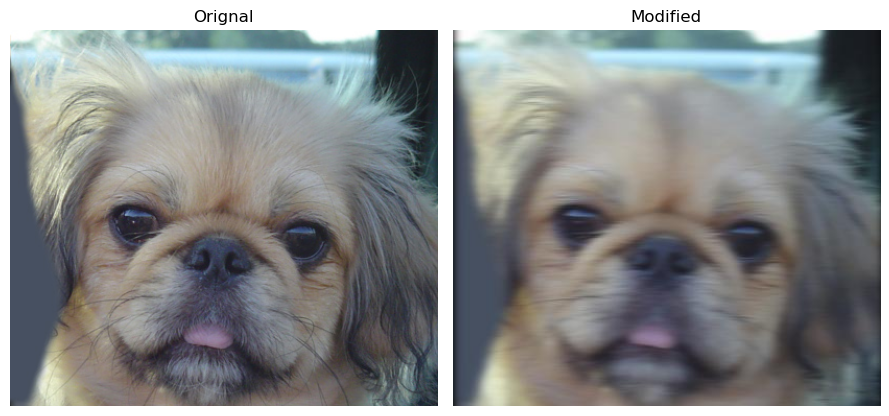

In [ ]:
#show both the original and filtered dog image:

#Load image :
dog_image_blur = Image.open('./dog_img_blur.jpg')

compare_image(dog_image, dog_image_blur)

### Question 2

Choose an appropriate sigma (it is suggested to use the same as above) and create a high frequency version of the second from the two the paired images. 
Again you will operate on each of the color channels separately and use same sigma for all channels.
High frequency filtered image is obtained by first computing a low frequency Gaussian filtered image and then subtracting it from the original. 
The high frequency image is actually zero-mean with negative values so it is visualized by adding 128 (if you re-scaled the original image to the range between 0 and 1, then add 0.5 for visualization). 



In the resulting visualization illustrated below, bright values are positive and dark values are negative.

In [ ]:
#1st we should import : 
from PIL import Image

In [ ]:
sigma = 3

#Lead cat image
cat_image = Image.open('0a_cat.bmp')

array1_cat = np.array(cat_image)

array2_cat = np.array(cat_image)

array2_cat[:,:,0] = gaussconvolve2d_scipy(array2_cat[:,:,0], sigma)
array2_cat[:,:,2] = gaussconvolve2d_scipy(array2_cat[:,:,2], sigma)

x = array1_cat[:,:,0] - array2_cat[:,:,0]
y = array1_cat[:,:,1] - array2_cat[:,:,1]
z = array1_cat[:,:,2] - array2_cat[:,:,2]

array2_cat[:,:,0] = x+128  
array2_cat[:,:,1] = y+128
array2_cat[:,:,2] = z+128

cat_mod= Image.fromarray(array2_cat).convert('RGB') 
cat_mod.save('cat_mod.jpg')



NameError: name 'gaussconvolve2d_scipy' is not defined

In [ ]:
#show both the original and filtered dog image:

#Load image :
cat_mod_img = Image.open('./cat_mod.jpg')

compare_image(cat_image, cat_mod_img)

### Question 3

Now simply add the low and high frquency images (per channel). 
Note, the high frequency image that you add,should be the originally computed high friequency image (without adding 128; this addition is only done for visualizationes in the part above)

Depending on the sigma value your image may look different. 
Experiment with at least 3 provided sets of images or create your own hybrid. 
Illustrate results for 3 different values of sigma for each of the images.

Note: 
You may see speckle artifacts (individual pixels of bright color that do not match the image content) in the final hybrid image produced. 
You should be able to get rid of most, if not all, of them by clamping the values of pixels on the high and low end to ensure they are in the valid range (between 0 and 255) for the final image. 
You will need to do this per color channel. 
However, depending on the chosen value of sigma and specific set of images a few artifacts may remain. 
If you are unable to completely get rid of those artifacts that's OK. 
You will not be penalized for them, assuming all other parts of the assignment are done correctly and you made a reasonable attempt at producing a good result image (e.g., by implementing the clamping procedure described).

## Part 4: Playing with Different Denoising Filters

In this question, you are given two images affected by Gaussian noise and speckle noise `box_gauss.png` and `box_speckle.png`. 
You will apply Gaussian filter, bilateral filter, and median filter respectively to denoise the images. 
Use the existing implementation in the OpenCV library `cv2`. 
Specifically, you will use the functions `cv2.GaussianBlur`, `cv2.bilateralFilter`, and `cv2.medianBlur`.

Please consult the OpenCV documentation for more details.

### Question 1

Play with different combinations of parameters for each filter and show your best results for denoising. 
Include the best combinations of parameters for each filter and the corresponding resultant images in your report. 
Note that since you have two images and three filters, you will include a total of six denoised images.

In [ ]:
img1=cv2.imread('box_gauss.png')
img2=cv2.imread('box_speckle.png')

filtre = np.ones((5,5), np.float32)/25

Gauss_image1 = cv2.GaussianBlur(img1, (5,5),0)
Gauss_image2 = cv2.GaussianBlur(img2, (5,5),0)

median_image1 = cv2.medianBlur(img1, 5)
median_image2 = cv2.medianBlur(img2, 5)

bilateral_image1 = cv2.bilateralFilter(img1, 5, 75, 75)
bilateral_image2 = cv2.bilateralFilter(img2, 5, 75, 75)

titles = ['img1' ,'img2', 'G_blur_img1' ,'G_blur_img1' , 'median_img1' , 'median_img2' , 'bilateral_img1' , 'bilateral_img2']
images = [img1   , img2 ,  G_blur_img1  , G_blur_img2  ,  median_img1  ,  median_img2  ,  bilateral_img1  ,  bilateral_img2 ]


for i in range(6):
    plt.subplot(2,3,i+1), plt.imshow(imgs[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

### Question 2

Now try to use the following combinations for the two images, and comment the pros and cons of using Gaussian, Bilateral, and Median filter. 

HINT: You might need to zoom in to see the artifacts clearly.

In [ ]:
import cv2
cv2.GaussianBlur(img, ksize=(7, 7), sigmaX=50)
cv2.bilateralFilter(img, 7, sigmaColor=150, sigmaSpace=150)
cv2.medianBlur(img,7)

In [23]:
img = cv2.imread('box_gauss.png')

GaussianBlur_img    = cv2.GaussianBlur(img, ksize=(7, 7), sigmaX=50)
bilateralFilter_img = cv2.bilateralFilter(img, 7, sigmaColor=150, sigmaSpace=150)
medianBlur_img      = cv2.medianBlur(img,7)

cv2_imshow(img), cv2_imshow(GaussianBlur_img), cv2_imshow(bilateralFilter_img), cv2_imshow(medianBlur_img)

#---------------------------------------------------------------#

img2 = cv2.imread('box_speckle.png')

img2_GaussianBlur    = cv2.GaussianBlur(img2, ksize=(7, 7), sigmaX=50)
img2_bilateralFilter = cv2.bilateralFilter(img2, 7, sigmaColor=150, sigmaSpace=150)
img2_medianBlur      =cv2.medianBlur(img2,7)

cv2_imshow(img2), cv2_imshow(img2_GaussianBlur), cv2_imshow(img2_bilateralFilter), cv2_imshow(img2_medianBlur)

error: OpenCV(4.5.1) ../modules/imgproc/src/smooth.dispatch.cpp:617: error: (-215:Assertion failed) !_src.empty() in function 'GaussianBlur'
